## Phase 1 Project-MICROSOFT MOVIE STUDIO ANALYSIS


* Student name: JULLIET ISWANA
* Student pace:  part time 
* Scheduled project review date/time: 24/07/2023
* Instructor name: ASHA DEEN
* GIT REPOSITORY:https://github.com/Iswana-O/dsc-phase-1-project/tree/master


**OVERVIEW**

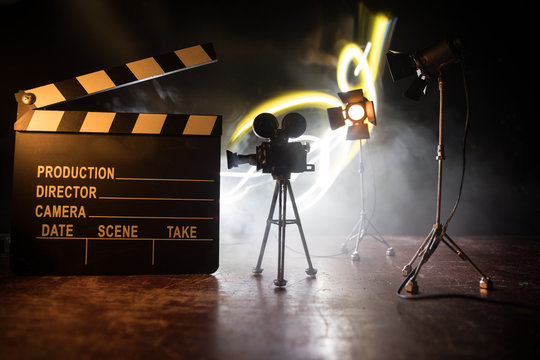

Over-The-Top (OTT) is a media distribution model that has gained popularity in recent years. It allows content providers to deliver television shows, movies, and videos directly to viewers via the Internet, bypassing traditional distribution methods such as broadcast, cable, and satellite TV providers. By using OTT platforms, content creators can reach a global audience without the need for intermediaries, giving them more control over their content and a broader reach. OTT service providers have various ways of acquiring new content to offer to their subscribers. The three primary methods are Purchasing Content, Producing Content, and Licensing content. Each of these approaches has its advantages and challenges. Purchasing existing content can provide immediate access to popular titles while producing original content allows the platform to build a unique brand identity. Licensing content can offer a cost-effective way to expand the content library, but it might come with restrictions or competition from other platforms seeking the same content.

This disruptive distribution model has transformed the media landscape and altered the way audiences consume entertainment content. Major players in this industry are Netflix, Hulu, Disney+, Prime Video, ESPN +, and HBO Max to name but a few. Another Key player interested in this industry is Microsoft who has seen all the big companies creating original video content and they want to get in on the fun. My goal in this project was to analyze box office movies and translate the findings into actionable insights that Microsoft can use in decision-making in regard to their new venture of creating a new movie studio.

**BUSINESS PROBLEM**


Microsoft's decision to venture into the movie industry presents exciting opportunities, but also potential challenges due to their lack of experience in creating films. To ensure a successful entry into this competitive market, it is important for them to understand the types of movies that are currently thriving at the box office. Analysis of the current trends and translating these findings into actionable insights, Microsoft can make informed decisions on the types of films it should produce to maximize its chances of success.


In [1]:
#importing the packages i will be using for the analysis
#import Pandas
import  pandas as pd

#import Numpy
import numpy as np

# Import matplotlib
import matplotlib.pyplot as plt

# Set plot space as inline for inline plots and qt for external plots
%matplotlib inline

#import seaborn
import seaborn as sns


**MOVIES DATA UNDERSTANDING**

11 Datasets were compiled for the project was compiled by the school from below sources for this analysis:

**_Box Office Mojo_**

**_IMDB_**

**_Rotten Tomatoes_**

**_TheMovieDB_**

**_The Numbers_**

Inorder to understand the data Pandas provided a convenient way to read the CSV and TSV files inform of rows and colummns


In [2]:
#creating variable for the path of my datasets which are in a different location from my notebook

path ='C:\\Users\\Admin\\Documents\\Flatiron\\Phase_ONE\\dsc-phase-1-project\\zippedData\\zippedData\\'

In [3]:
#reading the csv file into a data frame
tmdb_movies_df =pd.read_csv( path + 'tmdb.movies.csv', index_col=0)
tmdb_movies_df.head(2)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [4]:
movie_gross_df=pd.read_csv(path +'bom.movie_gross.csv', index_col = 0)
movie_gross_df.head(2)

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [5]:
name_basics_df =pd.read_csv(path +'name.basics.csv', index_col = 0)
name_basics_df.head(2)

,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


In [6]:
title_akas_df =pd.read_csv(path + 'title.akas.csv', index_col = 0)
title_akas_df.head(2)

,ordering,title,region,language,types,attributes,is_original_title
title_id,,,,,,,
tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0


In [7]:
title_basics_df =pd.read_csv(path +  'title.basics.csv', index_col = 0)
title_basics_df.head(2)

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [8]:
movie_budgets_df =pd.read_csv(path +'tn.movie_budgets.csv', index_col = 0)
movie_budgets_df.head(2)


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [9]:
title_ratings_df =pd.read_csv(path +'title.ratings.csv', index_col = 0)
title_ratings_df.head(2)


,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559


In [10]:
movie_info_df =pd.read_table(path + 'rt.movie_info.tsv', index_col = 0)
movie_info_df.head(2)

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [11]:
reviews_df =pd.read_table(path +'rt.reviews.tsv', encoding='unicode_escape',index_col = 0)
reviews_df.head(2)

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


In [12]:
title_principals_df =pd.read_csv(path + 'title.principals.csv', index_col = 0)
title_principals_df.head(2)

,ordering,nconst,category,job,characters
tconst,,,,,
tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
tt0111414,2,nm0398271,director,NaN,NaN


In [13]:
title_crew_df =pd.read_csv(path + 'title.crew.csv', index_col = 0)
title_crew_df.head(2)

,directors,writers
tconst,,
tt0285252,nm0899854,nm0899854
tt0438973,NaN,"nm0175726,nm1802864"


printing information about each DataFrame using the info() method and zip() function

to iterate over both the DataFrames and their corresponding names simultaneously.

In [14]:
#printing information about each DataFrame using the info() method 
#zip() function to iterate over both the DataFrames and their corresponding names simultaneously.

datasets_dfs = [movie_gross_df, title_principals_df,title_crew_df,reviews_df,movie_info_df,
                title_ratings_df,movie_budgets_df,tmdb_movies_df,title_basics_df,name_basics_df,title_akas_df]
df_names = ['movie_gross', 'title_principals', 'title_crew','reviews','movie_info','title_ratings',
            'movie_budgets','tmdb_movies','title_basics', 'name_basics', 'title_akas']
for df, name in zip(datasets_dfs, df_names):
    print(name, '\n')
    display(df.info())

movie_gross 

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


None

title_principals 

<class 'pandas.core.frame.DataFrame'>
Index: 1028186 entries, tt0111414 to tt9692684
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   ordering    1028186 non-null  int64 
 1   nconst      1028186 non-null  object
 2   category    1028186 non-null  object
 3   job         177684 non-null   object
 4   characters  393360 non-null   object
dtypes: int64(1), object(4)
memory usage: 47.1+ MB


None

title_crew 

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0285252 to tt9010172
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   directors  140417 non-null  object
 1   writers    110261 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


None

reviews 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 3 to 2000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      48869 non-null  object
 1   rating      40915 non-null  object
 2   fresh       54432 non-null  object
 3   critic      51710 non-null  object
 4   top_critic  54432 non-null  int64 
 5   publisher   54123 non-null  object
 6   date        54432 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.3+ MB


None

movie_info 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 146.2+ KB


None

title_ratings 

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  73856 non-null  float64
 1   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB


None

movie_budgets 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


None

tmdb_movies 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


None

title_basics 

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


None

name_basics 

<class 'pandas.core.frame.DataFrame'>
Index: 606648 entries, nm0061671 to nm9993380
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   primary_name        606648 non-null  object 
 1   birth_year          82736 non-null   float64
 2   death_year          6783 non-null    float64
 3   primary_profession  555308 non-null  object 
 4   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(3)
memory usage: 27.8+ MB


None

title_akas 

<class 'pandas.core.frame.DataFrame'>
Index: 331703 entries, tt0369610 to tt9880178
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ordering           331703 non-null  int64  
 1   title              331703 non-null  object 
 2   region             278410 non-null  object 
 3   language           41715 non-null   object 
 4   types              168447 non-null  object 
 5   attributes         14925 non-null   object 
 6   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 20.2+ MB


None

  **DATA CLEANING**

**DATA ANALYISIS**

Analysis on tmdb_movies_df datatset indicates  that Drama is the most produced genre

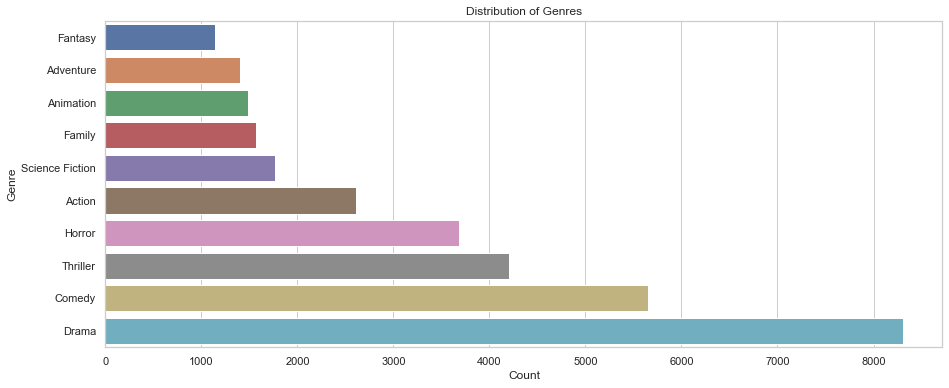

In [15]:
import ast
genres_count = {}
for genres_list in tmdb_movies_df['genre_ids']:
    genres_list = ast.literal_eval(genres_list)  # Convert string representation of list to a Python list
    for genre_id in genres_list:
        if genre_id in genres_count:
            genres_count[genre_id] += 1
        else:
            genres_count[genre_id] = 1

# Creating a DataFrame for plotting
genres_df = pd.DataFrame(list(genres_count.items()), columns=['Genre ID', 'Count'])

# Genre mapping for genre names
genre_mapping = {
    12: 'Adventure',
    14: 'Fantasy',
    10751: 'Family',
    16: 'Animation',
    28: 'Action',
    878: 'Science Fiction',
    35: 'Comedy',
    53: 'Thriller',
    27: 'Horror',
    18: 'Drama'
}


# Adding genre names to the DataFrame
genres_df['Genre Name'] = genres_df['Genre ID'].map(genre_mapping)

plt.figure(figsize=(15, 6))
# Sorting by count in ascending order
genres_df.sort_values('Count', ascending=True, inplace=True)

# Plotting using Seaborn
sns.set(style='whitegrid')
sns.barplot(x='Count', y='Genre Name', data=genres_df)

# Display the plot

plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Distribution of Genres')
plt.show()
